In [1]:
# Show the presence of sampling artifacts on synthetic data.
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('../code')
from artifacts import dft, image_patches
from filters import residuum
from utils import load_img

def extract_residuum(input_img):
    # Using the mean kernel for the residual noise.
    # normalize error 0 - 100
    img_f = input_img / 255.0
    H = np.ones((3,3), dtype=np.float32) / 8
    H[2, 2] = 0

    return residuum(img_f, H)


def normalize_spectrum(spectrum: np.ndarray) -> np.ndarray:
    
    return  spectrum / (spectrum.shape[0] * spectrum.shape[1])

In [2]:
synthetic_img_path = "../data/access-2022/western_blots_dataset/synth/cyclegan/img_00001.png"

In [3]:
synthetic = load_img(synthetic_img_path)

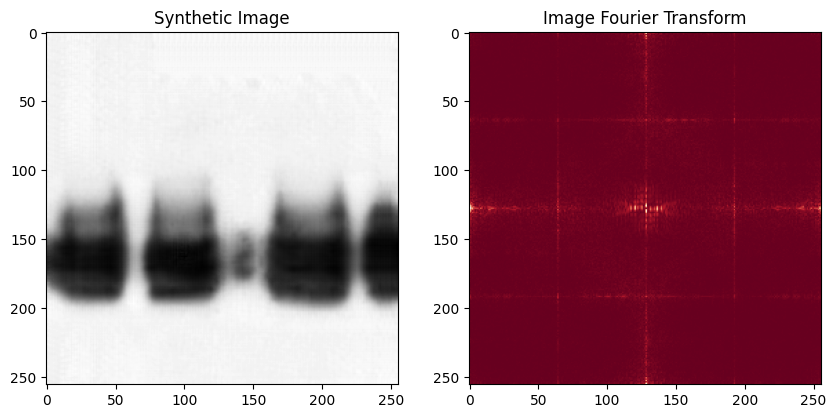

In [4]:
# Display Synthetic image side by their fourier transform
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(synthetic, cmap='gray')
ax[0].set_title("Synthetic Image")
res_noise = extract_residuum(synthetic)
fft_synthetic = normalize_spectrum( dft(res_noise))
center = fft_synthetic.shape[0] //2
fft_synthetic[center, center] =0
ax[1].imshow(np.log1p(fft_synthetic), cmap='RdBu')
ax[1].set_title("Image Fourier Transform")
plt.show()

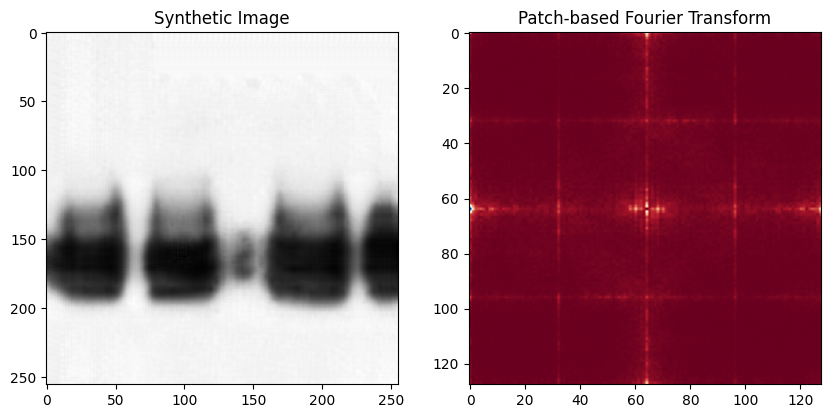

In [6]:
# Patch based Fourier Spectrum
# normalize error 0 - 100
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(synthetic, cmap='gray')
ax[0].set_title("Synthetic Image")
res_noise = extract_residuum(synthetic)
img_patches = image_patches(res_noise, patch_height=128, patch_width=128)
patches_fourrier = [dft(patches) for patches in img_patches]
patches_fourrier = [normalize_spectrum(patch) for patch in patches_fourrier]
fft_synthetic = np.mean(patches_fourrier, axis=0)
center = fft_synthetic.shape[0] //2
fft_synthetic[center, center] =0
ax[1].imshow(np.log1p(fft_synthetic), cmap='RdBu')
ax[1].set_title("Patch-based Fourier Transform")
plt.show()